## Importing the dependencies

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading the dataset

In [72]:
sonar_df = pd.read_csv('sonar_data.csv', header=None)

## Data Analysis

In [73]:
# shape
sonar_df.shape

(208, 61)

In [74]:
pd.set_option('display.max_rows', 100)
sonar_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

In [75]:
sonar_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
dtype: int64

In [76]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [77]:
# peek at data
pd.set_option('display.width', 100)
sonar_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [78]:
# describe dataset
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [79]:
# class distribution
sonar_df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

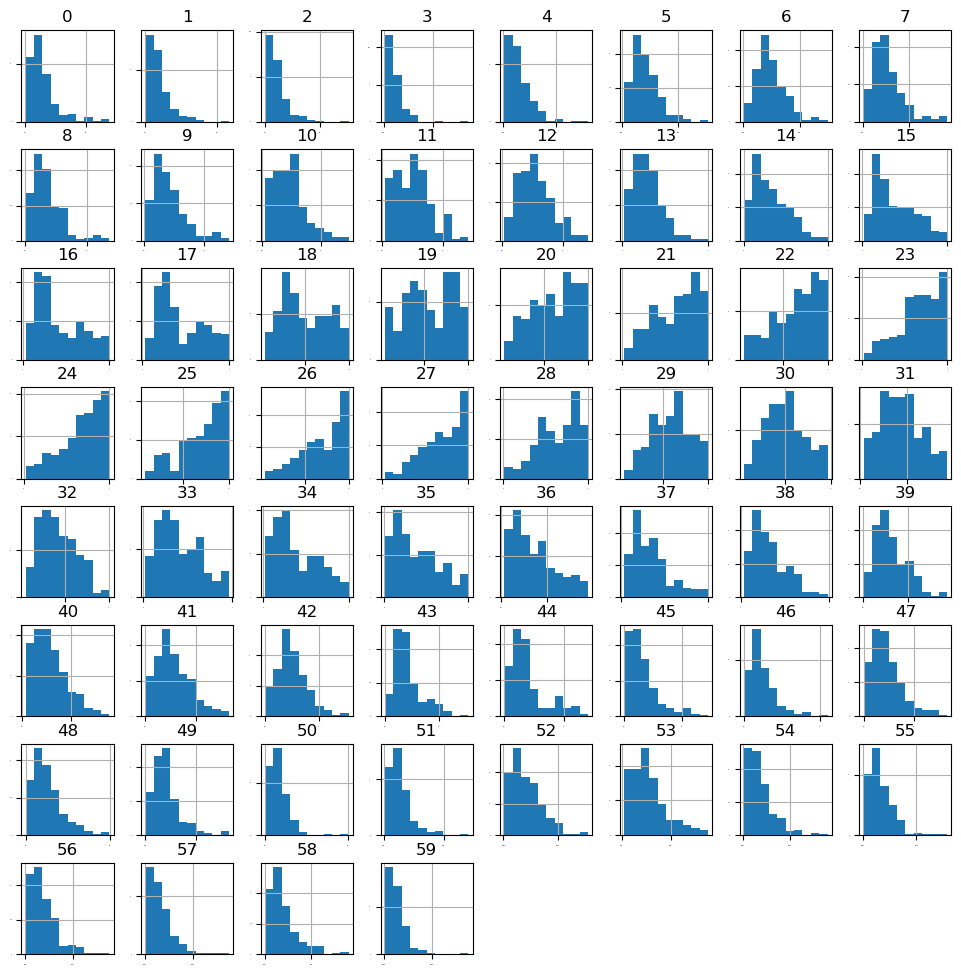

In [80]:
# histograms
sonar_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 12))
plt.show()

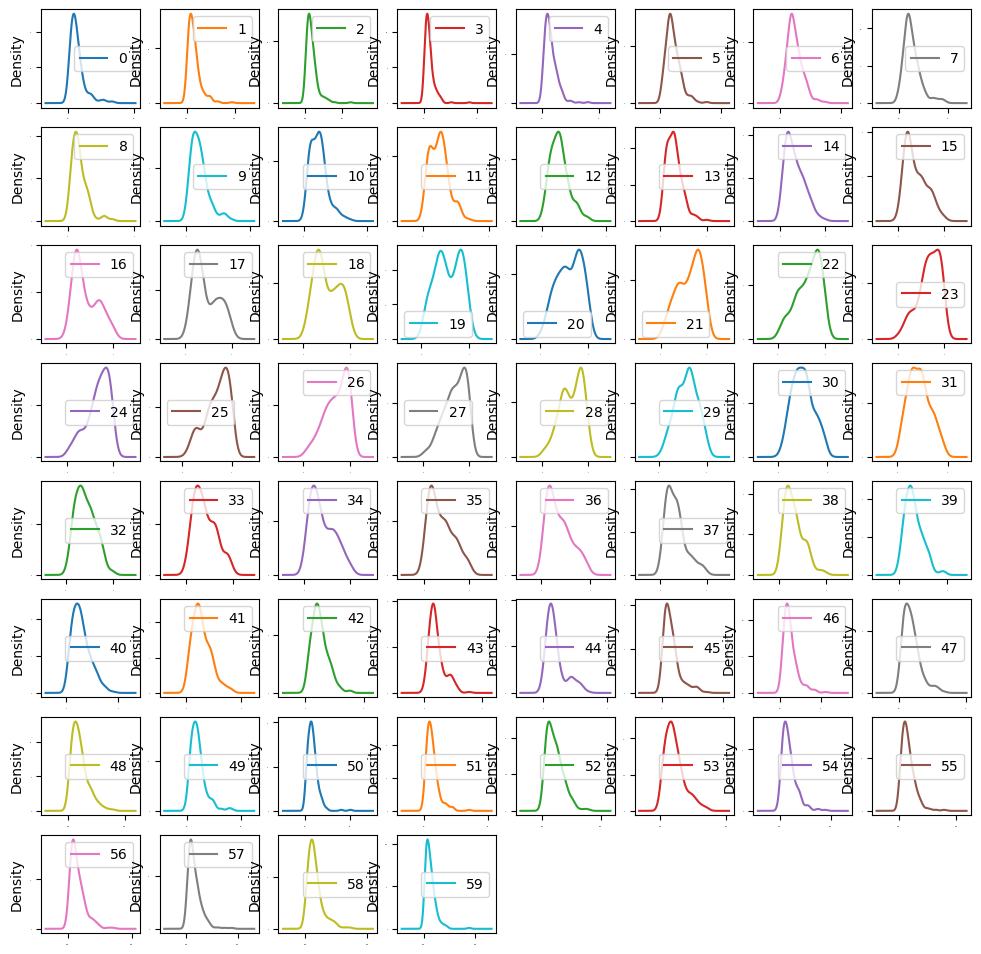

In [81]:
# density
sonar_df.plot(kind='density', subplots=True, layout=(8, 8), sharex=False, sharey=False, fontsize=1, figsize=(12, 12))
plt.show()

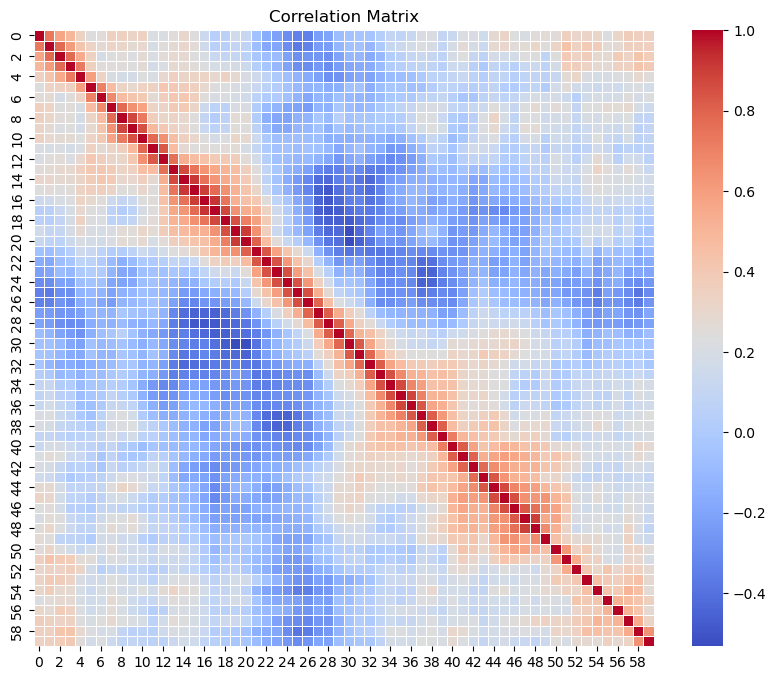

In [82]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(sonar_df.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Algorithm Evaluation

In [83]:
# Splitting the labels and the feature
X = sonar_df.iloc[:, :-1].values
y = sonar_df.iloc[:, -1].values

In [84]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [85]:
# Spot checking some algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))       

In [86]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)

LR: 0.8022058823529411 (0.08685812518143943)
LDA: 0.7599264705882354 (0.12722978779116187)
KNN: 0.7838235294117647 (0.09815281408851612)
CART: 0.7654411764705882 (0.07132352941176469)
NB: 0.6672794117647058 (0.1203868700737716)
SVM: 0.8136029411764707 (0.10287616119161179)


C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

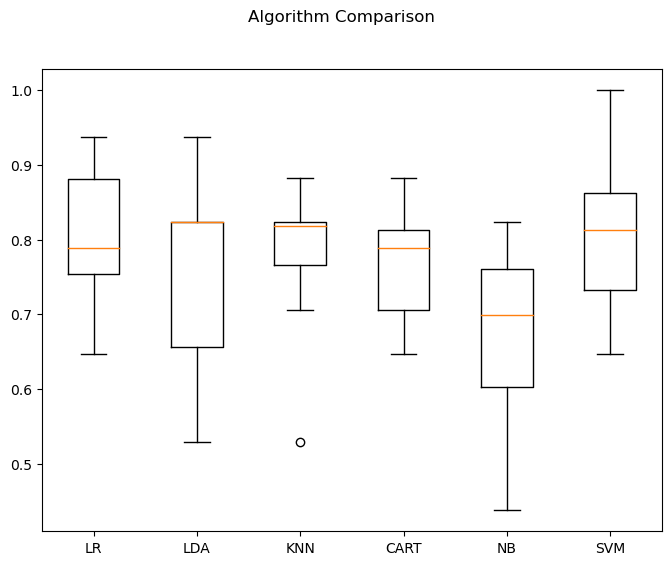

In [87]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

In [88]:
# Standarsize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [89]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)

ScaledLR: 0.825 (0.11976720137813839)
ScaledLDA: 0.7599264705882354 (0.12722978779116187)
ScaledKNN: 0.8132352941176471 (0.07409342508035655)
ScaledCART: 0.7529411764705882 (0.08701360113227655)
ScaledNB: 0.6672794117647058 (0.1203868700737716)
ScaledSVM: 0.81875 (0.1003757268887399)


C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

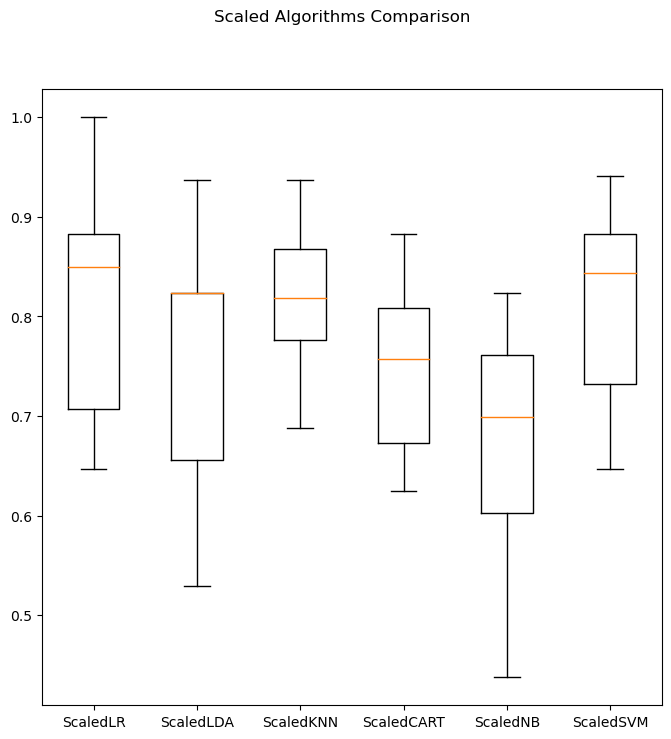

In [90]:
# Compare scaled algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8, 8)
plt.show()

LR, KNN and SVM show promise.

In [91]:
## KNN algorithm tuning
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train_scaled, y_train)

C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

In [93]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, std, param, rank in zip(means, stds, params, ranks):
    print(f"#{rank} {mean} ({std}) using {param}")

Best: 0.8547794117647058 using {'n_neighbors': 1}
#1 0.8547794117647058 (0.08173431645373422) using {'n_neighbors': 1}
#2 0.8253676470588236 (0.10333760327617943) using {'n_neighbors': 3}
#3 0.8073529411764706 (0.08404897443637387) using {'n_neighbors': 5}
#4 0.7705882352941176 (0.09651978211278943) using {'n_neighbors': 7}
#10 0.7110294117647059 (0.10931180205816822) using {'n_neighbors': 9}
#9 0.7165441176470588 (0.10113234866434567) using {'n_neighbors': 11}
#5 0.7477941176470588 (0.12041998664420701) using {'n_neighbors': 13}
#6 0.7408088235294118 (0.11736236233007369) using {'n_neighbors': 15}
#8 0.7172794117647059 (0.12946658681712483) using {'n_neighbors': 17}
#7 0.7294117647058823 (0.1346833239523923) using {'n_neighbors': 19}
#11 0.7051470588235293 (0.12455370154063687) using {'n_neighbors': 21}


In [94]:
# LR algorithm tuning
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
penalty_options = ['l1', 'l2']  # Regularization penalties to try
C_values = [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength (inverse of regularization parameter)
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Solver options to try
param_grid = dict(penalty=penalty_options, C=C_values, solver=solver_options)
model = LogisticRegression(max_iter=1000)  # max_iter is set to avoid convergence warning
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train_scaled, y_train)

C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: Con

C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\linear_model\_sag.py:352: Con

In [95]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, std, param, rank in zip(means, stds, params, ranks):
    print(f"#{rank} {mean} ({std}) using {param}")

Best: 0.8253676470588236 using {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
#60 nan (nan) using {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
#47 nan (nan) using {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
#39 0.5371323529411764 (0.11754878708132492) using {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
#51 nan (nan) using {'C': 0.001, 'penalty': 'l1', 'solver': 'sag'}
#42 0.5305147058823529 (0.11943777335563592) using {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
#34 0.7040441176470589 (0.16453386829123934) using {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
#34 0.7040441176470589 (0.16453386829123934) using {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
#38 0.6852941176470588 (0.0977720010373686) using {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
#34 0.7040441176470589 (0.16453386829123934) using {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
#34 0.7040441176470589 (0.16453386829123934) using {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
#59 

In [99]:
# SVM algorithm tuning
scaler = StandardScaler().fit(X_train)
C_train_scaled = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(C_train_scaled, y_train)

In [100]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, std, param, rank in zip(means, stds, params, ranks):
    print(f"#{rank} {mean} ({std}) using {param}")

Best: 0.8253676470588236 using {'C': 0.3, 'kernel': 'linear'}
#8 0.8125 (0.08339998776065563) using {'C': 0.1, 'kernel': 'linear'}
#40 0.5183823529411764 (0.126258800097562) using {'C': 0.1, 'kernel': 'poly'}
#39 0.5492647058823529 (0.12451462859264374) using {'C': 0.1, 'kernel': 'rbf'}
#37 0.6963235294117647 (0.11752291243879587) using {'C': 0.1, 'kernel': 'sigmoid'}
#1 0.8253676470588236 (0.05617305386899359) using {'C': 0.3, 'kernel': 'linear'}
#38 0.6393382352941177 (0.1782269369279313) using {'C': 0.3, 'kernel': 'poly'}
#25 0.7768382352941176 (0.13115316084771278) using {'C': 0.3, 'kernel': 'rbf'}
#31 0.7518382352941176 (0.11550497019669069) using {'C': 0.3, 'kernel': 'sigmoid'}
#14 0.8011029411764706 (0.054144065242998335) using {'C': 0.5, 'kernel': 'linear'}
#36 0.7106617647058824 (0.1454512315860412) using {'C': 0.5, 'kernel': 'poly'}
#18 0.7948529411764705 (0.11365944245038107) using {'C': 0.5, 'kernel': 'rbf'}
#27 0.7584558823529413 (0.1015937285632878) using {'C': 0.5, 'kern

KNN is giving the best accuracy with tuned params

Let me try some ensemble models now

In [101]:
ensembles = []
ensembles.append(('ADA', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [103]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)

ADA: 0.84375 (0.09869457732533031)
GBM: 0.8794117647058822 (0.06522601774601498)
RF: 0.8367647058823529 (0.1225561272448649)
ET: 0.8492647058823529 (0.08910417778235706)


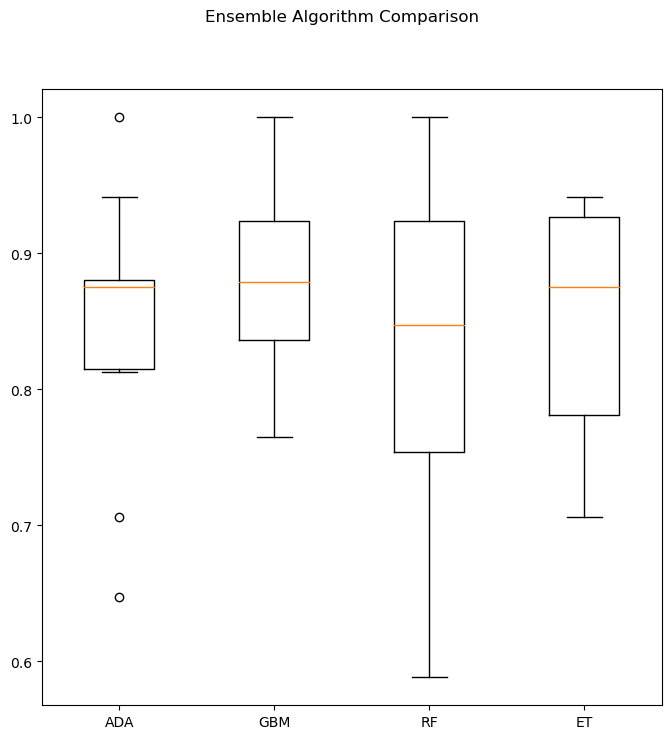

In [104]:
# Compare ensemble algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8, 8)
plt.show()

GBM shows some real promise!

In [105]:
# GBM algorithm tuning
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
n_estimators = [50, 100, 150, 200]  # Number of boosting stages to try
learning_rates = [0.01, 0.1, 0.2, 0.3]  # Learning rates to try
max_depth = [3, 5, 7, 9]  # Maximum depth of the individual estimators
param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rates, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train_scaled, y_train)

In [106]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, std, param, rank in zip(means, stds, params, ranks):
    print(f"#{rank} {mean} ({std}) using {param}")

Best: 0.8797794117647058 using {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
#31 0.7838235294117647 (0.0874474632195206) using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
#20 0.7963235294117647 (0.08720600634848838) using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
#20 0.7963235294117647 (0.07773279580236771) using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
#13 0.8147058823529412 (0.08743818874617128) using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
#28 0.7897058823529411 (0.07968363049496507) using {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
#32 0.7834558823529412 (0.08377917428127704) using {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
#30 0.7893382352941176 (0.07094826231561654) using {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
#16 0.807720588235294 (0.08302720949966363) using {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
#44 0.77169117647

In [ ]:
#1 0.8797794117647058 (0.045208630652422206) using {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
#1 0.8547794117647058 (0.08173431645373422) using {'n_neighbors': 1}

I am gonna use build models using both GBM and KNN, even though GBM has a better performance, as KNN is much simpler and yet it doesn't really lag far behind

In [108]:
# prepare KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [110]:
# accuracy on test set
X_test_scaled = scaler.transform(X_test)
y_pred_test = model_knn.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

0.9047619047619048
[[20  2]
 [ 2 18]]
              precision    recall  f1-score   support

           M       0.91      0.91      0.91        22
           R       0.90      0.90      0.90        20

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



C:\Users\anupa\.android\trial\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [111]:
# prepare GBM
model_gbm = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=150)
model_gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=150)

In [112]:
# accuracy on test set
y_pred_test = model_gbm.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

0.7142857142857143
[[17  5]
 [ 7 13]]
              precision    recall  f1-score   support

           M       0.71      0.77      0.74        22
           R       0.72      0.65      0.68        20

    accuracy                           0.71        42
   macro avg       0.72      0.71      0.71        42
weighted avg       0.71      0.71      0.71        42



GBM turned out to be a damper :(, but KNN really exceeded my expectation :) !